# Diabetes-no-readmitted Dataset Analysis

In [1]:
import pandas as pd
import numpy as np

## General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45715 entries, 0 to 45714
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      45715 non-null  object
 1   gender                    45715 non-null  object
 2   age                       45715 non-null  object
 3   admission_type_id         45715 non-null  int64 
 4   discharge_disposition_id  45715 non-null  int64 
 5   admission_source_id       45715 non-null  int64 
 6   time_in_hospital          45715 non-null  int64 
 7   num_lab_procedures        45715 non-null  int64 
 8   num_procedures            45715 non-null  int64 
 9   num_medications           45715 non-null  int64 
 10  number_outpatient         45715 non-null  int64 
 11  number_emergency          45715 non-null  int64 
 12  number_inpatient          45715 non-null  int64 
 13  diag_1                    45715 non-null  object
 14  diag_2                

<AxesSubplot:ylabel='readmitted'>

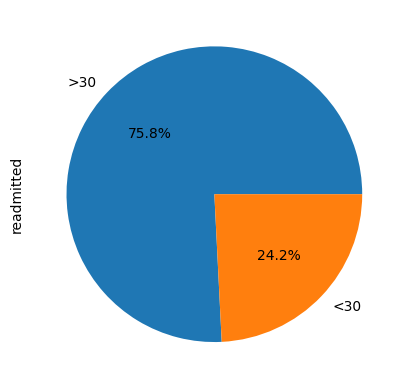

In [2]:
df = pd.read_csv("../Cleaned/Diabetes/diabetes-no-readmitted.csv", skipinitialspace=True)
df.info()
print("target count")
print(df['readmitted'].value_counts())
df['readmitted'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## gender

Female    25062
Male      20653
Name: gender, dtype: int64


<AxesSubplot:ylabel='gender'>

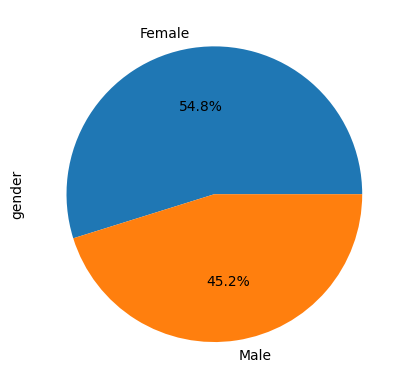

In [3]:
print(df['gender'].value_counts())
df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = Male

>30    15589
<30     5064
Name: readmitted, dtype: int64


<AxesSubplot:ylabel='readmitted'>

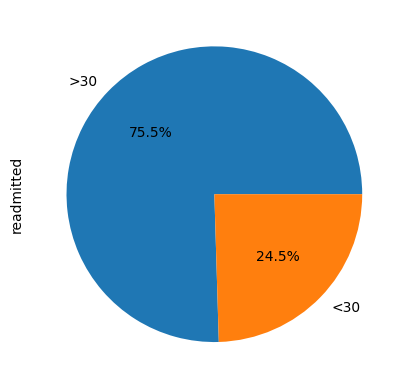

In [4]:
print(df.loc[df['gender']=="Male"]['readmitted'].value_counts())
df.loc[df['gender']=="Male"]['readmitted'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = Female

>30    19060
<30     6002
Name: readmitted, dtype: int64


<AxesSubplot:ylabel='readmitted'>

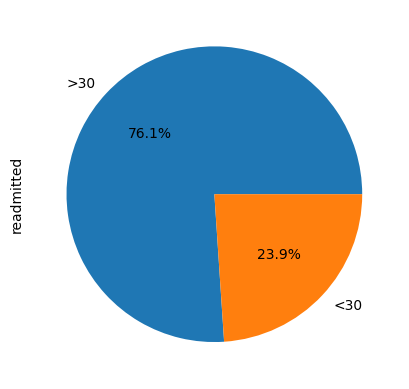

In [5]:
print(df.loc[df['gender']=="Female"]['readmitted'].value_counts())
df.loc[df['gender']=="Female"]['readmitted'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = <30

let y- = not <30

let s0 = Male

let s1 = Female

In [6]:
# p(y+|s0) -> p(<30|Male)
p1 = len(df.loc[(df['gender']=="Male") & (df['readmitted']=="<30")]) / len(df.loc[df['gender']=="Male"])
#print(p1)
# p(y-|s1) -> p(!<30|Female)
p2 = len(df.loc[(df['gender']=="Female") & (df['readmitted']!="<30")]) / len(df.loc[df['gender']=="Female"])
#print(p2)
# p(y+|s1) -> p(<30|Female)
p3 = len(df.loc[(df['gender']=="Female") & (df['readmitted']=="<30")]) / len(df.loc[df['gender']=="Female"])
#print(p3)
# p(y-|s0) -> p(!<30|Male)
p4 = len(df.loc[(df['gender']=="Male") & (df['readmitted']!="<30")]) / len(df.loc[df['gender']=="Male"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.032


In [7]:
#OR for s0 = Female
oddsratio = (p3 * p4) / (p1 * p2)
print("OR: {:.3f}".format(oddsratio))

OR: 0.969


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >50K

let y- = <=50K

let s0 = Male

let s1 = Female

In [8]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.024


### Proxies

Most of the proxies found for sex include (a combination of):
 - 

Best model (min depth) found with a node at depth 1 with 80 samples.

	** diag_1_600 > 0.5 ,  #impurity: 0.0, #samples: 80.

Best model (max sample) found with 80 sample in a node at depth 1.

	** diag_1_600 > 0.5 ,  #impurity: 0.0, #samples: 80.
        

For proxy: diag_1 == 600

Male    80
Name: gender, dtype: int64


<AxesSubplot:ylabel='gender'>

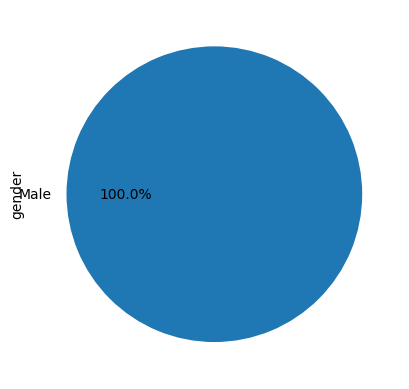

In [9]:
print(df.loc[(df['diag_1']=="600")]['gender'].value_counts())
df.loc[(df['diag_1']=="600")]['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

>30    56
<30    24
Name: readmitted, dtype: int64


<AxesSubplot:ylabel='readmitted'>

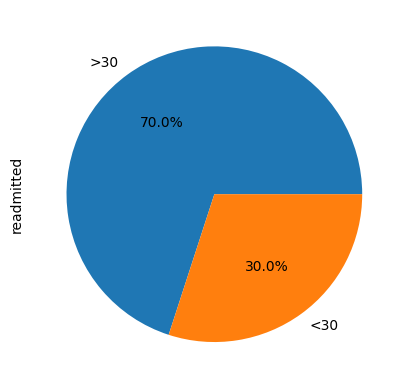

In [10]:
print(df.loc[(df['diag_1']=="600")]['readmitted'].value_counts())
df.loc[(df['diag_1']=="600")]['readmitted'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = <30

let y- = !<30

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [11]:
# p(y+|s0) -> p(<30|Proxy)
p1 = len(df.loc[(df['diag_1']=="600") & (df['readmitted']=="<30")]) / len(df.loc[df['diag_1']=="600"])
#print(p1)
# p(y-|s1) -> p(!<30|!Proxy)
p2 = len(df.loc[(df['diag_1']!="600") & (df['readmitted']!="<30")]) / len(df.loc[df['diag_1']!="600"])
#print(p2)
# p(y+|s1) -> p(<30|!Proxy)
p3 = len(df.loc[(df['diag_1']!="600") & (df['readmitted']=="<30")]) / len(df.loc[df['diag_1']!="600"])
#print(p3)
# p(y-|s0) -> p(!<30|Proxy)
p4 = len(df.loc[(df['diag_1']=="600") & (df['readmitted']!="<30")]) / len(df.loc[df['diag_1']=="600"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.343


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = <30

let y- = !<30

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [12]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.240
